# Python kick-off

The Python standard library is documented at https://docs.python.org/3/library/ and include basic functions like `print`.

Specialised tools, such as pandapower, are usually made available in other libraries (modules).
For example NumPy (http://www.numpy.org/) functions for numerical computation, very similar to what we can do in MATLAB.

To use a function from a module we need to make it available in our program , what is called as 'importing'. 

In [1]:
import pandapower as pp
from pandapower.plotting import simple_plotly, pf_res_plotly

In [2]:
import numpy as np
import copy

Basic functionalities of Python

In [3]:
#Declare and call a function
def sum_and_increment(a, b):
    """"Return the sum of a and b, plus 1"""
    return a + b + 1
# N.B. Python is sensible to indentation!!

# Call the function
m = sum_and_increment(3, 4)
print(m)  # Expect 8

8


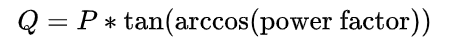

In [4]:
def get_reactive(P,PF):
    """" Calculate reactive power from Active power and Power Factor """
    return P*np.tan(np.arccos(PF))

# Basic types:

In [6]:
my_string = "This is a string."
print(my_string)
print(type(my_string))

This is a string.
<class 'str'>


In [7]:
# Get 3rd character (Python counts from zero!)
s2 = my_string[2]
print(s2)
print(type(s2))

i
<class 'str'>


In [8]:
x = True
print(type(x))

name = 'Sara'
print(type(name))

age = 20
print(type(age))

money = 20.
print(type(money))

<class 'bool'>
<class 'str'>
<class 'int'>
<class 'float'>


In [9]:
text_string = "My name is {} and I am {} years old and I have {} bucks.".format(name, age, money)
print(text_string)

My name is Sara and I am 20 years old and I have 20.0 bucks.


# Simple Data Structures

`list`. Similar to `array` in Matlab but can contain different types of variables:

In [10]:
empty = [] #create an empty list
empty

[]

In [11]:
list0 = ['Sara', 20, 20.]
list0

['Sara', 20, 20.0]

In [12]:
list1 = [name, age, money]
list1

['Sara', 20, 20.0]

Let's iterate over a `list`:

In [13]:
for element in list1:
    print(element)

Sara
20
20.0


Let's use the function `enumerate` to get the position and the element of the list

In [14]:
for position, element in enumerate(list1):
    text_string = 'The element number {} of the list is {}.'.format(position+1, element)
    print(text_string)

The element number 1 of the list is Sara.
The element number 2 of the list is 20.
The element number 3 of the list is 20.0.


Indexing in a `list`:

In [15]:
third_element = list1[2]
print(third_element)

20.0


`tuple`. Like a `list` but once assigned values cannot be changed.

In [16]:
tuple_1 = ('Sara', 20, 20.)
tuple_1

('Sara', 20, 20.0)

`dictionary`

In [17]:
dictionary1 = {'name': 'Sara', 'age': 20 , 'money': 20.}
print(dictionary1)
print(dictionary1.keys())
print(dictionary1.values())

{'name': 'Sara', 'age': 20, 'money': 20.0}
dict_keys(['name', 'age', 'money'])
dict_values(['Sara', 20, 20.0])


# Pandas

Most popular Python library for data analysis

In [18]:
import pandas as pd

`DataFrame` is like a `table` in Matlab. 

To create a `DataFrame` we can pass a `dictionary` to the function inside pandas library `pd.DataFrame()`

In [19]:
dictionary1 = {'Product_A': [50, 47], 'Product_B': [131, 120]}
df = pd.DataFrame(dictionary1)
df

,Product_A,Product_B
0,50,131
1,47,120


In [20]:
df.index=['Seller_1', 'Seller_2']
df

,Product_A,Product_B
Seller_1,50,131
Seller_2,47,120


What I am doing here is to look inside the `DataFrame` and look at the `attribute` that shows indexes

There are several ways to access data of a DataFrame. For more info: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [21]:
df.Product_A #attribute

Seller_1    50
Seller_2    47
Name: Product_A, dtype: int64

To get the first row of data we can use `iloc` (Index-based selection)

In [22]:
df.iloc[0] #the order is row-column

Product_A     50
Product_B    131
Name: Seller_1, dtype: int64

In [23]:
df.iloc[:,0]

Seller_1    50
Seller_2    47
Name: Product_A, dtype: int64

In [24]:
print(type(df.iloc[0]))

<class 'pandas.core.series.Series'>


A series is like a vector of a table, or like a `DataFrame` of just one column.

Or `loc` (Label-based selection): 

In [25]:
df

,Product_A,Product_B
Seller_1,50,131
Seller_2,47,120


In [26]:
df.loc['Seller_1'] #the order is row-column

Product_A     50
Product_B    131
Name: Seller_1, dtype: int64

In [27]:
df.loc[:,'Product_A']

Seller_1    50
Seller_2    47
Name: Product_A, dtype: int64

Let's take another DataFrame

In [28]:
df1 = pd.DataFrame({'P1': [0, 1], 'P2': [2, 3]})
df1

,P1,P2
0,0,2
1,1,3


`append` method adds rows to a `DataFrame`

In [29]:
df2 = pd.DataFrame({'P1': [40, 100], 'P2': [20, 30]})
df1 = df1.append(df2, ignore_index= True)

# Data analysis

`loc` canalso accept `booleans`: this is pretty useful when we want to access data based on particular logic conditions.

Let's say we want to get the row of the seller that sells the product A < 50

In [30]:
df.Product_A < 50

Seller_1    False
Seller_2     True
Name: Product_A, dtype: bool

In [31]:
df.loc[df.Product_A < 50]

,Product_A,Product_B
Seller_2,47,120


This can be useful for many applications

# Data visualization

In [32]:
import matplotlib.pyplot as plt

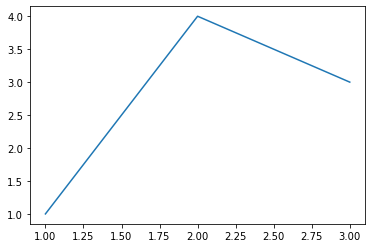

In [33]:
plt.plot([1,2,3],[1,4,3])

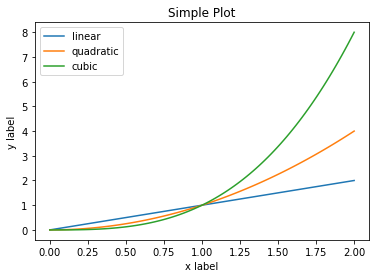

In [34]:
x = np.linspace(0, 2, 100) # Generate 100 evenly spaced numbers from 0 to 2

plt.plot(x, x, label='linear')  # Plot some data on the axes.
plt.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
plt.plot(x, x**3, label='cubic')  # ... and some more.
plt.xlabel('x label')  # Add an x-label to the axes.
plt.ylabel('y label')  # Add a y-label to the axes.
plt.title("Simple Plot")  # Add a title to the axes.
plt.legend()  # Add a legend.

# Pandapower

https://pandapower.readthedocs.io/en/v2.4.0/index.html

Create an empty grid: https://pandapower.readthedocs.io/en/v2.4.0/elements/empty_network.html

In [35]:
net = pp.create_empty_network()

Get pandapower standard library parameters

In [36]:
#pp.available_std_types(net, element="trafo")
pp.available_std_types(net, element="line")

,c_nf_per_km,r_ohm_per_km,x_ohm_per_km,max_i_ka,type,q_mm2,alpha
NAYY 4x50 SE,210.00,0.6420,0.083,0.142,cs,50,0.00403
NAYY 4x120 SE,264.00,0.2250,0.080,0.242,cs,120,0.00403
NAYY 4x150 SE,261.00,0.2080,0.080,0.270,cs,150,0.00403
NA2XS2Y 1x95 RM/25 12/20 kV,216.00,0.3130,0.132,0.252,cs,95,0.00403
NA2XS2Y 1x185 RM/25 12/20 kV,273.00,0.1610,0.117,0.362,cs,185,0.00403
NA2XS2Y 1x240 RM/25 12/20 kV,304.00,0.1220,0.112,0.421,cs,240,0.00403
NA2XS2Y 1x95 RM/25 6/10 kV,315.00,0.3130,0.123,0.249,cs,95,0.00403
NA2XS2Y 1x185 RM/25 6/10 kV,406.00,0.1610,0.110,0.358,cs,185,0.00403
NA2XS2Y 1x240 RM/25 6/10 kV,456.00,0.1220,0.105,0.416,cs,240,0.00403
NA2XS2Y 1x150 RM/25 12/20 kV,250.00,0.2060,0.116,0.319,cs,150,0.00403


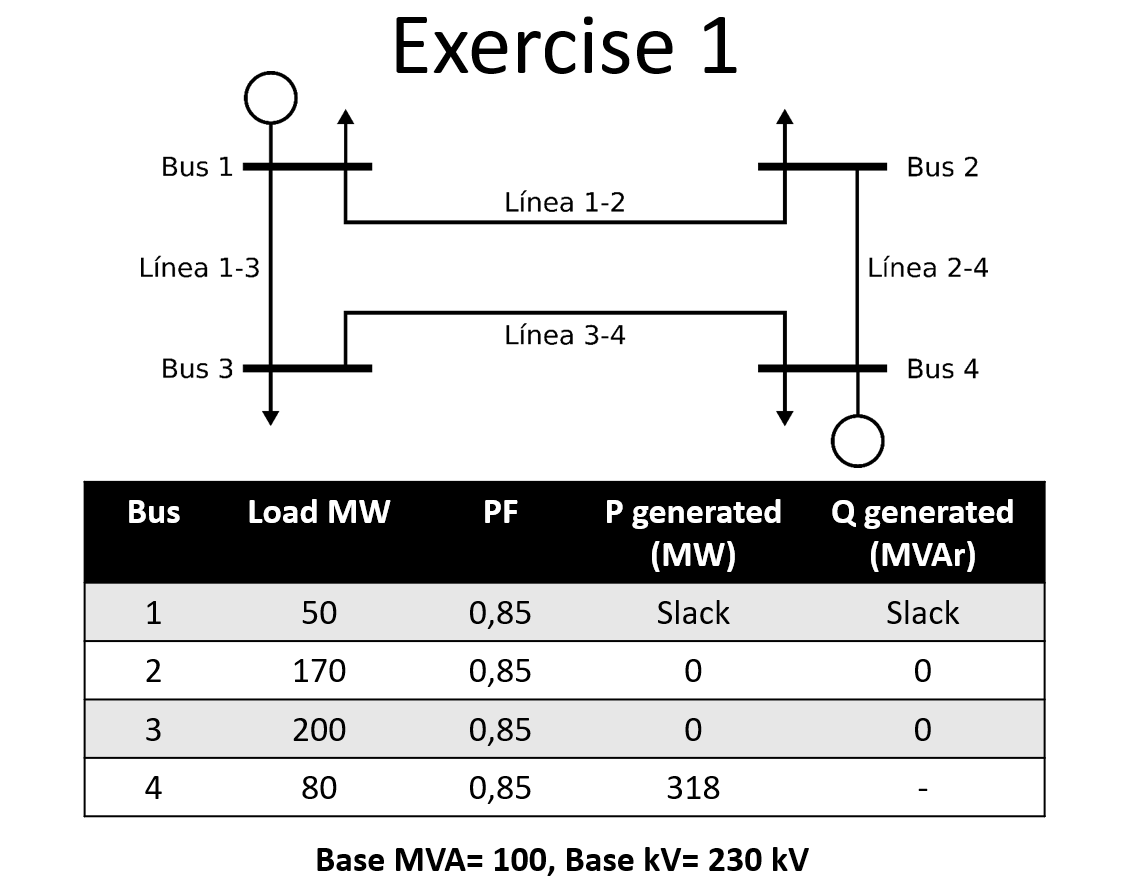

# Buses

In [37]:
PF = 0.85 #Power Factor

In [38]:
bus1 = pp.create_bus(net, name="Bus 1", vn_kv=230)
bus2 = pp.create_bus(net, name="Bus 2", vn_kv=230)
bus3 = pp.create_bus(net, name="Bus 3", vn_kv=230)
bus4 = pp.create_bus(net, name="Bus 4", vn_kv=230)

In [39]:
net.bus

,name,vn_kv,type,zone,in_service
0,Bus 1,230.0,b,None,True
1,Bus 2,230.0,b,None,True
2,Bus 3,230.0,b,None,True
3,Bus 4,230.0,b,None,True


In [40]:
# Bus 1 Slack
pp.create_ext_grid(net, bus1)
# Functions return the unique ID of the created element

0

<img style="float: center;" src="bus.png" width="90%">

In [41]:
# Bus 1 Load
p_mw = 50
q_mvar=get_reactive(p_mw,PF)
pp.create_load(net, bus1, p_mw, q_mvar)

# Bus 2 Load
p_mw = 170
q_mvar=get_reactive(p_mw,PF)
pp.create_load(net, bus2, p_mw, q_mvar)

# Bus 3 Load
p_mw = 200
q_mvar=get_reactive(p_mw,PF)
pp.create_load(net, bus3, p_mw, q_mvar)

# Bus 4 Load
p_mw = 80
q_mvar=get_reactive(p_mw,PF)
pp.create_load(net, bus4, p_mw, q_mvar)

3

<img style="float: center;" src="generator.png" width="90%">

In [42]:
# Bus 4 Generator
p_mw = 318
PF = 1
q_mvar = get_reactive(p_mw,PF)
pp.create_sgen(net, bus4, p_mw, q_mvar)

0

# Lines

In this example lines are characterized in p.u.

<img style="float: center;" src="line.png" width="90%">

Pandapower needs lines parameters in physical units per km and the lenght of the lines. 

And do not need Susceptance B!

In [43]:
r1_2 = 0.01008
r1_3 = 0.00744
r2_4 = 0.00744
r3_4 = 0.01272

x1_2 = 0.05040
x1_3 = 0.03720
x2_4 = 0.03720
x3_4 = 0.06360

create_line_from_parameters : https://pandapower.readthedocs.io/en/v2.4.0/elements/line.html

<img style="float: center;" src="lines_input.png" width="60%">

Since data are in p.u. we have to translate the information into pandapower accepted format.

<img style="float: center;" src="Base_values.png" width="50%">

<img style="float: center;" src="Base_impedance.png" width="20%"> 

In [44]:
Z_b = 230**2/100
Z_b

529.0

In [5]:
def get_per_km_value(a_pu,L,Z_b):
    """" Calculate physical quantity in per km given the p.u. value """
    return a_pu*Z_b/L

If we suppose a medium lenght line L = 100km we cannot neglect capacitance C [nF], which becomes more and more importante the more the line is long. 

Let's suppose a typical capacitance of C = 18,2 nF/km for all lines

In [45]:
L = 100
c_nf_km = 18.2

Let's suppose also the maximum thermal current to be 0.960 kA. 

In [46]:
max_i_ka = 0.960

In [47]:
r1_2_km = get_per_km_value(r1_2,L,Z_b)
r1_3_km = get_per_km_value(r1_3,L,Z_b)
r2_4_km = get_per_km_value(r2_4,L,Z_b)
r3_4_km = get_per_km_value(r3_4,L,Z_b)

x1_2_km = get_per_km_value(x1_2,L,Z_b)
x1_3_km = get_per_km_value(x1_3,L,Z_b)
x2_4_km = get_per_km_value(x2_4,L,Z_b)
x3_4_km = get_per_km_value(x3_4,L,Z_b)

In [48]:
pp.create_line_from_parameters(net, from_bus = bus1, to_bus = bus2, length_km = L, r_ohm_per_km = r1_2_km, x_ohm_per_km = x1_2_km, c_nf_per_km = c_nf_km , max_i_ka = max_i_ka, name=12)
pp.create_line_from_parameters(net, from_bus = bus1, to_bus = bus3, length_km = L, r_ohm_per_km = r1_3_km, x_ohm_per_km = x1_3_km, c_nf_per_km = c_nf_km , max_i_ka = max_i_ka, name=13)
pp.create_line_from_parameters(net, from_bus = bus2, to_bus = bus4, length_km = L, r_ohm_per_km = r2_4_km, x_ohm_per_km = x2_4_km, c_nf_per_km = c_nf_km , max_i_ka = max_i_ka, name=24)
pp.create_line_from_parameters(net, from_bus = bus3, to_bus = bus4, length_km = L, r_ohm_per_km = r3_4_km, x_ohm_per_km = x3_4_km, c_nf_per_km = c_nf_km , max_i_ka = max_i_ka, name=34)

3

In [49]:
net

This pandapower network includes the following parameter tables:
   - bus (4 elements)
   - load (4 elements)
   - sgen (1 element)
   - ext_grid (1 element)
   - line (4 elements)

In [50]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,None,0,50.0,30.987217,0.0,0.0,NaN,1.0,True,None
1,None,1,170.0,105.356538,0.0,0.0,NaN,1.0,True,None
2,None,2,200.0,123.948868,0.0,0.0,NaN,1.0,True,None
3,None,3,80.0,49.579547,0.0,0.0,NaN,1.0,True,None


In [51]:
net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source
0,None,3,318.0,0.0,NaN,1.0,True,None,True


In [52]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,12,None,0,1,100.0,0.053323,0.266616,18.2,0.0,0.96,1.0,1,None,True
1,13,None,0,2,100.0,0.039358,0.196788,18.2,0.0,0.96,1.0,1,None,True
2,24,None,1,3,100.0,0.039358,0.196788,18.2,0.0,0.96,1.0,1,None,True
3,34,None,2,3,100.0,0.067289,0.336444,18.2,0.0,0.96,1.0,1,None,True


In [53]:
net.bus

,name,vn_kv,type,zone,in_service
0,Bus 1,230.0,b,None,True
1,Bus 2,230.0,b,None,True
2,Bus 3,230.0,b,None,True
3,Bus 4,230.0,b,None,True


Imagine I want to access the voltage of the 4th bus from my network

Remember of the label-based selection `loc`

In [54]:
net.bus.loc[3, 'vn_kv']

230.0

In [55]:
pp.runpp(net)

In [56]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-138.16145,-198.118668
1,0.944564,-0.565924,170.00000,105.356538
2,0.946120,-1.666785,200.00000,123.948868
3,0.949446,2.663621,-238.00000,49.579547


In [57]:
net.res_load

,p_mw,q_mvar
0,50.0,30.987217
1,170.0,105.356538
2,200.0,123.948868
3,80.0,49.579547


In [58]:
net.res_sgen

,p_mw,q_mvar
0,318.0,0.0


In [59]:
net.res_ext_grid

,p_mw,q_mvar
0,188.16145,229.105885


What is the efficiency of the grid?

In [60]:
dem = sum(net.res_load['p_mw'])
dem

500.0

In [61]:
inj = sum(net.res_sgen['p_mw']) + sum(net.res_ext_grid['p_mw'])
inj 

506.161449665067

In [62]:
eff = dem/inj
eff

0.9878271060169752

Create a function that gives me the efficiency of the power system:

In [63]:
def get_eff(net):
    return sum(net.res_load['p_mw'])/(sum(net.res_sgen['p_mw']) + sum(net.res_ext_grid['p_mw']))

# Transformer

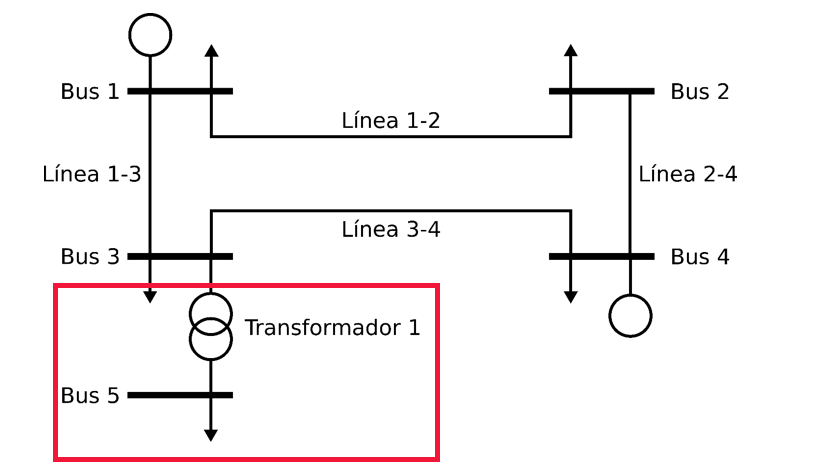

<img style="float: center;" src="transformer_input.png" width="80%">  

In [64]:
net1 = pp.pandapowerNet(copy.deepcopy(net)) #Let's create a new net

In [65]:
bus5 = pp.create_bus(net1, name="Bus 5", vn_kv=25)

# Bus 5 Load
p_mw = 80
q_mvar=get_reactive(p_mw, PF=0.6)
pp.create_load(net1, bus5, p_mw, q_mvar)

4

As before, we have to characterize it through the apposite function. 

create_transformer_from_parameters : https://pandapower.readthedocs.io/en/v2.4.0/elements/trafo.html

<img style="float: center;" src="transformer_function.png" width="80%">                               

I have to make assumption on parameters such as the real part of the relative short-circuit voltage, iron losses and open loop losses (=0).

In [66]:
pp.create_transformer_from_parameters(net1, hv_bus = bus3, lv_bus = bus5, sn_mva = 150, vn_hv_kv = net1.bus.iloc[2].vn_kv, vn_lv_kv = net1.bus.iloc[4].vn_kv, vk_percent = 7, vkr_percent = 0, pfe_kw = 0, i0_percent = 0)

0

<img style="float: center;" src="transformer.png" width="90%">  

In [67]:
pp.runpp(net1)

In [68]:
net1.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-224.427332,-353.544755
1,0.926313,-0.863767,170.000000,105.356538
2,0.896110,-2.854493,200.000000,123.948868
3,0.918953,2.303075,-238.000000,49.579547
4,0.835410,-5.712994,80.000000,106.666667


Several buses are now out of voltage acceptable range (+-10%)!

What is the new efficiency of the system?

In [69]:
get_eff(net1)

0.9790230275930487

Lower than previously!

# Shunt Reactance

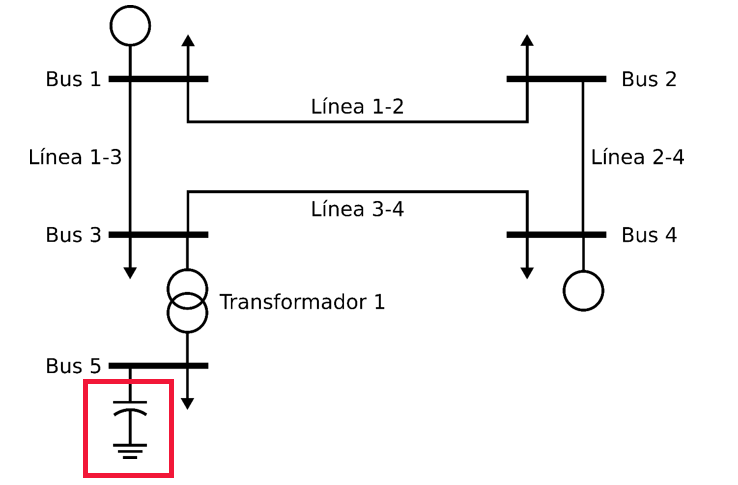

In [70]:
net2 = pp.pandapowerNet(copy.deepcopy(net1))

How much shunt reactance we are going to add to on bus 5 in order to lower the undervoltage?

In [71]:
pp.create_shunt(net2, bus5, q_mvar = -90, p_mw=0.0)

0

In [72]:
pp.runpp(net2)

In [73]:
net2.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-221.059661,-251.345556
1,0.937454,-0.980412,170.000000,105.356538
2,0.926388,-3.059521,200.000000,123.948868
3,0.937407,1.990091,-238.000000,49.579547
4,0.908882,-5.600854,80.000000,32.320756


In [74]:
get_eff(net2)

0.9846201305968568

Let's suppose we want to increase the load at bus 2 (without changing the PF). 

At which level of the load the voltage at this bus goes below 0.9 p.u.?

In [75]:
net3 = pp.pandapowerNet(copy.deepcopy(net2))

Let's use a while cycle:

In [76]:
load = []
voltage = []
df = []
S = pd.DataFrame(columns = ['Load [MW]','Voltage Bus 2 [kV]']) #The Dataframe has to be initialized if we want to append!

while net3.res_bus.loc[1, 'vm_pu'] > 0.9:
    net3.load.loc[1,'p_mw'] = net3.load.loc[1,'p_mw'] + 10 #increase the load
    net3.load.loc[1,'q_mvar'] = get_reactive(net3.load.loc[1,'p_mw'],PF) #update the reactive load
    try:
        pp.runpp(net3) # repeat the powerflow
        load = net3.load.loc[1,'p_mw']
        voltage = net3.res_bus.loc[1,'vm_pu']
        #Create a dataframe with the new solution
        df = pd.DataFrame({'Load [MW]': [load], 'Voltage Bus 2 [kV]': [voltage] })
        S = S.append(df, ignore_index = True)
    except:
        pass

In [77]:
net3.load.loc[1,'p_mw']

720.0

Let's plot the result:

Text(0.5, 1.0, 'Evolution of the Voltage with increasing Load')

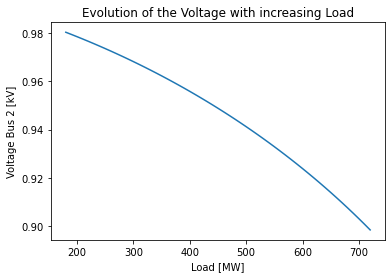

In [78]:
plt.plot(S.loc[:,'Load [MW]'], S.loc[:, 'Voltage Bus 2 [kV]'])
plt.xlabel('Load [MW]') 
plt.ylabel('Voltage Bus 2 [kV]')  
plt.title('Evolution of the Voltage with increasing Load')

Increasing too much the load can jeopardize the stability of the system.

To what degree can we increase the load until the system is unstable?

In [79]:
net3 = pp.pandapowerNet(copy.deepcopy(net2))

In [80]:
def get_evolution_voltage(net):
    load = []
    voltage = []
    df = []
    S = pd.DataFrame(columns = ['Load [MW]','Voltage Bus 2 [kV]']) #The Dataframe has to be initialized if we want to append!
    while net.res_bus.loc[1, 'vm_pu'] > 0.7:
        net.load.loc[1,'p_mw'] = net.load.loc[1,'p_mw'] + 10 #increase the load
        net.load.loc[1,'q_mvar'] = get_reactive(net.load.loc[1,'p_mw'],PF) #update the reactive load
        try:
            pp.runpp(net) # repeat the powerflow
            load = net.load.loc[1,'p_mw']
            voltage = net.res_bus.loc[1,'vm_pu']
            #Create a dataframe with the new solution
            df = pd.DataFrame({'Load [MW]': [load], 'Voltage Bus 2 [kV]': [voltage] })
            S = S.append(df, ignore_index = True)
        except:
            pass
    return [S,voltage]

In [81]:
[S,voltage] = get_evolution_voltage(net3)

In [82]:
voltage

0.6964528886926955

Text(0.5, 1.0, 'Evolution of the Voltage with increasing Load')

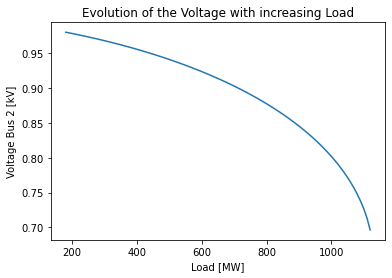

In [83]:
plt.plot(S.loc[:,'Load [MW]'], S.loc[:, 'Voltage Bus 2 [kV]'])
plt.xlabel('Load [MW]') 
plt.ylabel('Voltage Bus 2 [kV]')  
plt.title('Evolution of the Voltage with increasing Load')

What if we change the power factor?

In [84]:
net4 = pp.pandapowerNet(copy.deepcopy(net2))

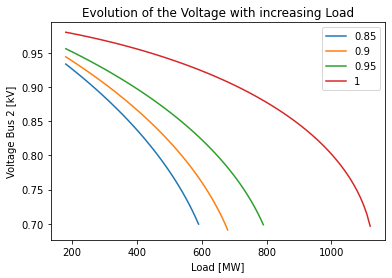

In [85]:
PF = 0.85
while PF <= 1:
    net4 = pp.pandapowerNet(copy.deepcopy(net2)) #reinitialize the network
    net4.load.loc[1,'q_mvar'] = get_reactive(net4.load.loc[1,'p_mw'],PF) #update the reactive load
    pp.runpp(net4)
    [S,voltage] = get_evolution_voltage(net4)
    PF = PF + 0.05
    plt.plot(S.loc[:,'Load [MW]'], S.loc[:, 'Voltage Bus 2 [kV]'])

plt.xlabel('Load [MW]') 
plt.ylabel('Voltage Bus 2 [kV]')  
plt.title('Evolution of the Voltage with increasing Load')
plt.legend([0.85,0.9,0.95,1])